# SME0829 Aprendizado de Máquina


por **Cibele Russo**

**ICMC/USP - São Carlos SP**



## Programa

Classificação em problemas com resposta binária





#### Modelo Binomial: para modelar proporções


Se $Y^\star$ é a proporção de sucessos em $n$ ensaios independentes de Bernoulli, cada um com probabilidade de sucesso $\mu$, então $nY^\star\sim B(n,\mu)$, com densidade dada por

$$\begin{array}{lll}f(y)  &=& P(Y=y) = \left(\begin{array}{c} n\\ ny^\star\end{array}\right)\mu ^{ny^\star}(1-\mu)^{n-ny^\star} = \\ &=&\exp\left\{\log  \left(\begin{array}{c} n\\ ny^\star\end{array}\right) + ny^\star \log\left(\displaystyle\frac{\mu}{1-\mu} + n\log(1-\mu)\right)\right\},\end{array}  $$

em que $\mu>0$, $y^\star<1$. Nesse caso, $\phi =n$, $\theta = \log\displaystyle\left(\frac{\mu}{1-\mu}\right)$, $b(\theta) = \log(1+e^\theta)$, e $c(y^\star, \phi) = \log  \left(\begin{array}{c} \phi\\ \phi y^\star\end{array}\right)$. Segue que $V(\mu) = \mu(1-\mu)$.



## O modelo de regressão logística

Um dos modelos lineares mais utilizados é o modelo de regressão logística.

Neste modelo, consideramos


$Y_i = \left\{\begin{array}{l}1, \mbox{ se o indivíduo i possui determinada característica}\\ 0, \mbox{ caso contrário}\end{array}\right.$

Supondo que $P(Y_i|X_i) = \pi(X_i)$ e que

$$\log\left\{\displaystyle\frac{\pi(x)}{1-\pi(x)}\right\} = \alpha+\beta x$$

e queremos estimar os parâmetros $\alpha$ e $\beta$ para compreender como $X_i$ e $Y_i$ estão associados.



Suponha que $X_i=1$ indique que o indivíduo $i$ possui um fator de risco para uma determinada doença (indicada por $Y_i=1)$ e foram observados $n_1$ indivíduos com a presença deste fator, e $n_2$ indivíduos sem a presença deste fator ($X_i=0$). 


Para os indivíduos que possuiam o fator, a **chance** de desenvolvimento da doença fica

$$\displaystyle\frac{\pi(1)}{1-\pi(1)} = e^{\alpha + \beta},$$

enquanto que a **chance** de desenvolvimento da doença no indivíduo com ausência do fator é

$$\displaystyle\frac{\pi(0)}{1-\pi(0)} = e^{\alpha }.$$


A razão de chances nesse caso fica

$$\psi =  \displaystyle\frac{\pi(1)/(1-\pi(1))}{\pi(0)/(1-\pi(0))} = e^\beta.$$



### Regressão logística múltipla


O modelo de regressão logística pode ser estendido para incluir $p$ variáveis preditoras:

$Y_i = \left\{\begin{array}{l}1, \mbox{ se o indivíduo i possui determinada característica}\\ 0, \mbox{ caso contrário}\end{array}\right.$

Supondo que $P(Y_i|X_i) = \pi(X_i)$ e que

$$\log\left\{\displaystyle\frac{\pi(x)}{1-\pi(x)}\right\} = \beta_0 + \beta_1 x_{1} + \beta_2 x_{2} + \ldots + \beta_p x_{p}.$$


# A qualidade da predição

**Métricas de predição**
- Erro absoluto médio
- Erro quadrático médio
- Raiz do erro quadrático médio

- Taxa observada de erros
- Matriz de confusão
- Curva ROC
- AUC



## Dados com resposta binomial

Referência sugerida: https://www.statsmodels.org/devel/examples/notebooks/generated/glm.html


## Aplicação

Considere os dados do arquivo dados_banco.csv. Estão disponíveis as variáveis:

- Cliente: Identificador do cliente.
- Sexo: Feminino (F) ou Masculino (M)
- Idade: Idade do cliente, em anos completos.
- Empresa: Tipo da empresa em que trabalha: Pública, Privada ou Autônomo
- Salário: Salário declarado pelo cliente na abertura da conta, em reais.
- Saldo_cc: Saldo em conta corrente, em reais.
- Saldo_poupança: Saldo em poupança, em reais.
- Saldo_investimento: Saldo em investimentos, em reais.
- Devedor_cartao: Valor em atraso no cartão de crédito, em reais.
- Inadimplente: Se o cliente é considerado inadimplente atualmente (1) ou não (0), de acordo com critérios preestabelecidos.

In [2]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In [3]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
# Dados banco - Leitura dos dados
#dados = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Modelos-de-Regressao/master/Regress%C3%A3o%20Log%C3%ADstica/amostra_banco.csv', index_col=0, decimal='.')

dados = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Estatistica-Ciencia-Dados/main/Data/dados_banco.csv', index_col=0, decimal='.')

dados

,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
Cliente,,,,,,,,,
75928,M,32,Privada,5719.00,933.79,0.0,0.0,6023.68,0
52921,F,28,Privada,5064.00,628.37,0.0,0.0,1578.24,0
8387,F,24,Autônomo,4739.00,889.18,0.0,0.0,2578.70,0
54522,M,30,Pública,5215.00,1141.47,0.0,0.0,4348.96,0
45397,M,30,Autônomo,5215.56,520.70,0.0,0.0,1516.78,1
...,...,...,...,...,...,...,...,...,...
33487,F,31,Pública,5016.00,498.96,0.0,0.0,1263.34,0
71360,M,29,Pública,5329.00,1142.82,0.0,0.0,5613.71,0
92455,M,34,Privada,5581.00,885.34,0.0,0.0,1199.22,0


In [ ]:
dados['Inadimplente'].value_counts()

0    7539
1    2461
Name: Inadimplente, dtype: int64

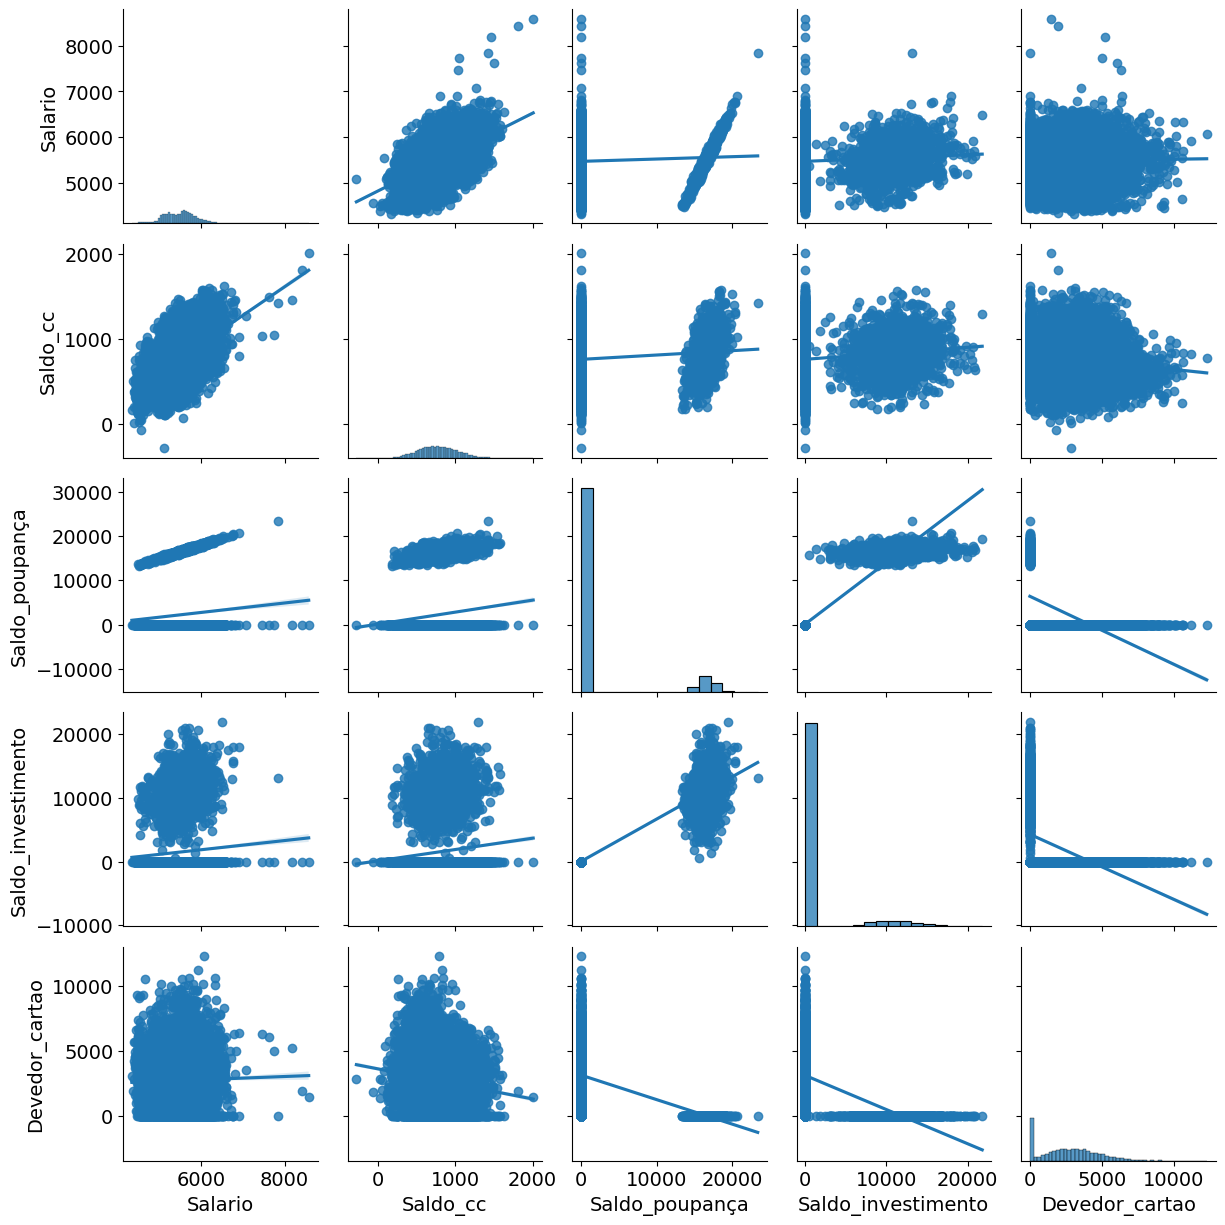

In [ ]:
sns.pairplot(dados[['Salario','Saldo_cc', 'Saldo_poupança', 'Saldo_investimento', 'Devedor_cartao']], kind='reg')

In [5]:
# vamos considerar as variáveis Salario e Devedor_cartão, somente os clientes que possuem algum saldo devedor no cartão
# Considerando só os clientes que tem saldo devedor no cartão diferente de zero

dados = dados[dados['Devedor_cartao']!=0]

len(dados)



8323

**Divisão da base em treino e teste**

In [6]:
dados_treino, dados_teste = train_test_split(dados,train_size = 0.8,random_state=3)

In [ ]:
dados['Devedor_cartao']

Cliente
75928    6023.68
52921    1578.24
8387     2578.70
54522    4348.96
45397    1516.78
          ...   
33487    1263.34
71360    5613.71
92455    1199.22
61296    1152.97
52862    4684.66
Name: Devedor_cartao, Length: 8323, dtype: float64

### Ajuste de modelo de regressão logística com as 2 preditores

In [7]:
### Ajustando um MLG com resposta binária, iniciando com 4 preditoras

preditoras = dados_treino[['Salario', 'Devedor_cartao']]
resposta = dados_treino['Inadimplente']


In [8]:
preditoras.head()

,Salario,Devedor_cartao
Cliente,,
66105,5493.88,7421.83
20604,6220.00,711.69
80002,5090.00,2990.17
2762,5888.82,5848.05
47455,5696.74,3140.52


In [9]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:           Inadimplente   No. Observations:                 6658
Model:                            GLM   Df Residuals:                     6656
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3490.4
Date:                Thu, 13 Apr 2023   Deviance:                       6980.9
Time:                        23:14:56   Pearson chi2:                 7.00e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1462
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Salario           -0.0005   1.39e-05    -36.

In [24]:
X_teste = dados_teste[['Salario', 'Devedor_cartao']]
y_teste = dados_teste['Inadimplente']

y_predito = res.predict(X_teste)

In [20]:
predito_01 = np.empty(len(res.predict(X_teste))) 

for i in range(0,len(res.predict(X_teste)+1)):
  if (res.predict(X_teste).iloc[i]>0.5):
    predito_01[i] = 1
  else:
    predito_01[i] = 0 


In [14]:
predito

array([0., 0., 0., ..., 1., 0., 0.])

In [16]:
print("Erro quadrático médio = ", mean_squared_error(predito, Y_teste))


Erro quadrático médio =  0.24564564564564564


In [17]:
dados_treino.loc[:,'const']  = 1
dados_teste.loc[:,'const']  = 1

In [18]:
dados_treino.head()

,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente,const
Cliente,,,,,,,,,,
66105,M,34,Privada,5493.88,484.81,0.0,0.0,7421.83,1,1
20604,M,36,Privada,6220.00,662.72,0.0,0.0,711.69,0,1
80002,F,29,Privada,5090.00,906.09,0.0,0.0,2990.17,0,1
2762,M,35,Privada,5888.82,519.94,0.0,0.0,5848.05,1,1
47455,M,34,Privada,5696.74,796.16,0.0,0.0,3140.52,1,1


In [ ]:
preditoras = dados_treino[['const','Salario', 'Devedor_cartao']]
resposta = dados_treino[['Inadimplente']]

X_teste = dados_teste[['const','Salario', 'Devedor_cartao']]
y_teste = dados_teste[['Inadimplente']]



In [ ]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

predito = res.predict(X_teste)

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Inadimplente   No. Observations:                 6658
Model:                            GLM   Df Residuals:                     6655
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3461.8
Date:                Thu, 13 Apr 2023   Deviance:                       6923.5
Time:                        19:53:23   Pearson chi2:                 7.08e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1535
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.1571      0.420      7.

In [ ]:
print("Erro quadrático médio = ", mean_squared_error(predito, Y_teste))

Erro quadrático médio =  0.1775789230800455


In [ ]:
predito_01 = np.empty(len(res.predict(X_teste))) 

for i in range(0,len(res.predict(X_teste)+1)):
  if (res.predict(X_teste).iloc[i]>0.5):
    predito_01[i] = 1
  else:
    predito_01[i] = 0 

In [25]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

y_predito = predito_01

confusion_matrix(y_teste,y_predito)
pd.crosstab(y_teste, y_predito, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0,1093,50,1143
1,359,163,522
All,1452,213,1665


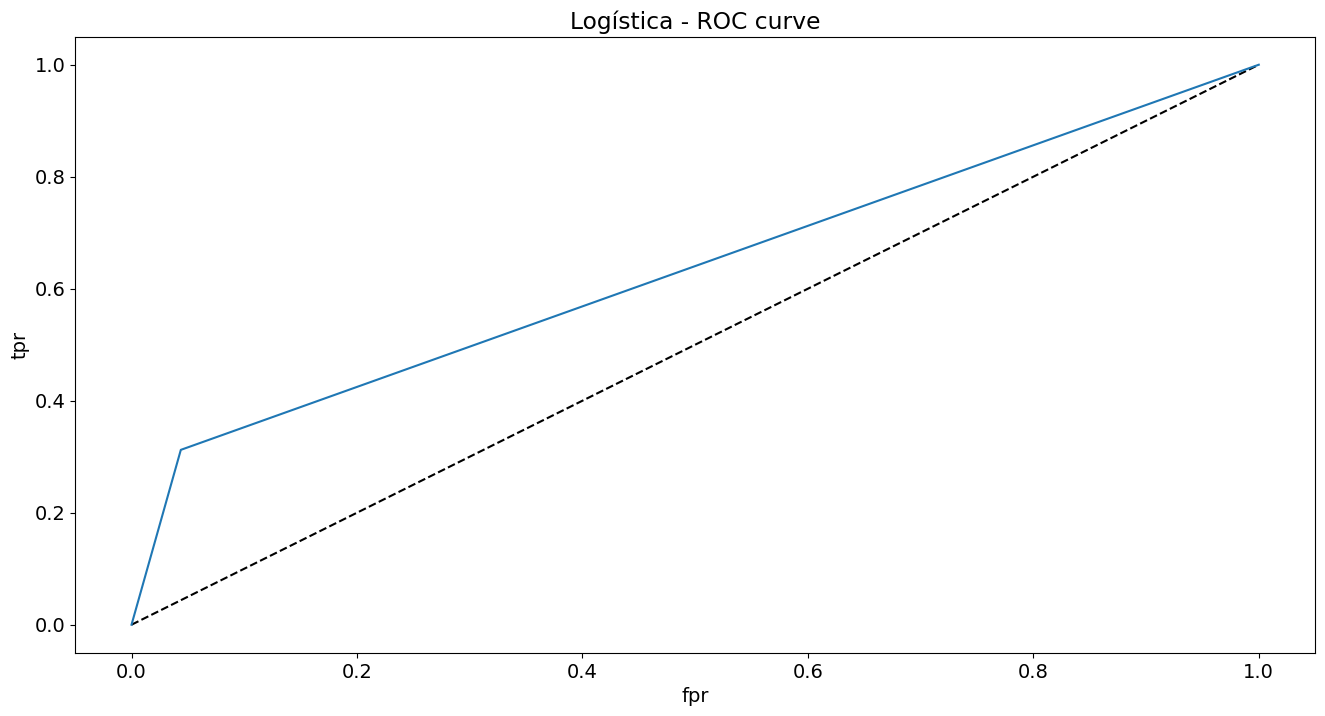

In [26]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_teste, predito)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistica')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logística - ROC curve')
plt.show()

In [28]:
#Inspirado em https://www.kaggle.com/code/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed

from sklearn.neighbors import KNeighborsClassifier

X_treino = dados_treino[['Salario', 'Devedor_cartao']].values
y_treino = dados_treino['Inadimplente'].values

X_teste = dados_teste[['Salario', 'Devedor_cartao']].values
y_teste = dados_teste['Inadimplente'].values


In [30]:
# Sugerido por Faceli e outros (2022)

import sklearn as skl # importa o sckit-learn

# normaliza os valores dos atributos para que fiquem com media igual a zero e desvio padrao igual a um
scaler = skl.preprocessing.StandardScaler().fit(X_treino)
X_treino = scaler.transform(X_treino)
X_teste = scaler.transform(X_teste)

In [32]:
test_scores = []
train_scores = []

for i in range(1,20):
    knn = KNeighborsClassifier(i)
    knn.fit(X_treino,y_treino)
    
    train_scores.append(knn.score(X_treino,y_treino))
    test_scores.append(knn.score(X_teste,y_teste))


In [33]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [34]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.15615615615616 % and k = [13, 14]


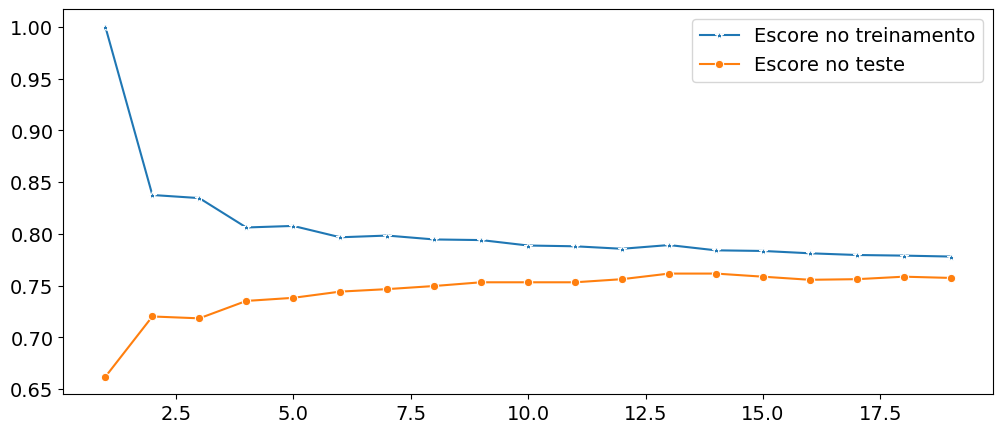

In [35]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,20),y=train_scores,marker='*',label='Escore no treinamento')
p = sns.lineplot(x=range(1,20),y=test_scores,marker='o',label='Escore no teste')

In [36]:
# Escolhendo k=14

#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(14)

knn.fit(X_treino,y_treino)
knn.score(X_teste,y_teste)



0.7615615615615615

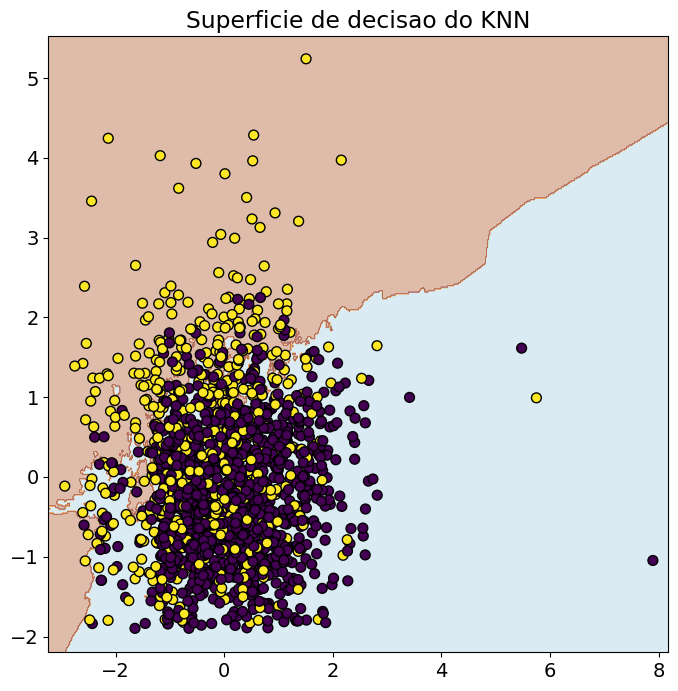

In [37]:
def plota_superficieDecisao(classifier, X, Y, ax, title = ""):
    h = .02  # tamanho do passo da malha (mesh)

    # cria uma malha (mesh)
    x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
    y_min, y_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
     

    # obtem a predicao
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # converte os valores do vetor para indices
    Z2 = np.unique(Z, return_inverse=True)[1]

    # plota a superficie de decisao
    Z2 = Z2.reshape(xx.shape)
    ax.contourf(xx, yy, Z2, cmap=plt.cm.Paired, alpha=.4)

    # converte os valores do vetor para indices
    Y2 = np.unique(Y, return_inverse=True)[1]

    # plota os dados de treinamento
    ax.scatter(X[:, 0], X[:, 1], c=Y2, edgecolor='k', s=50)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title, fontsize='large')
    

# define o tamanho da figura
fig, ax = plt.subplots(figsize=(8, 8)) 

# chama a funcao para plotar a superficie de decisao juntamente com os dados de teste
plota_superficieDecisao(knn, X_teste, y_teste, ax, title = "Superficie de decisao do KNN")


In [38]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_predito = knn.predict(X_teste)
confusion_matrix(y_teste,y_predito)
pd.crosstab(y_teste, y_predito, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1088,55,1143
1,342,180,522
All,1430,235,1665


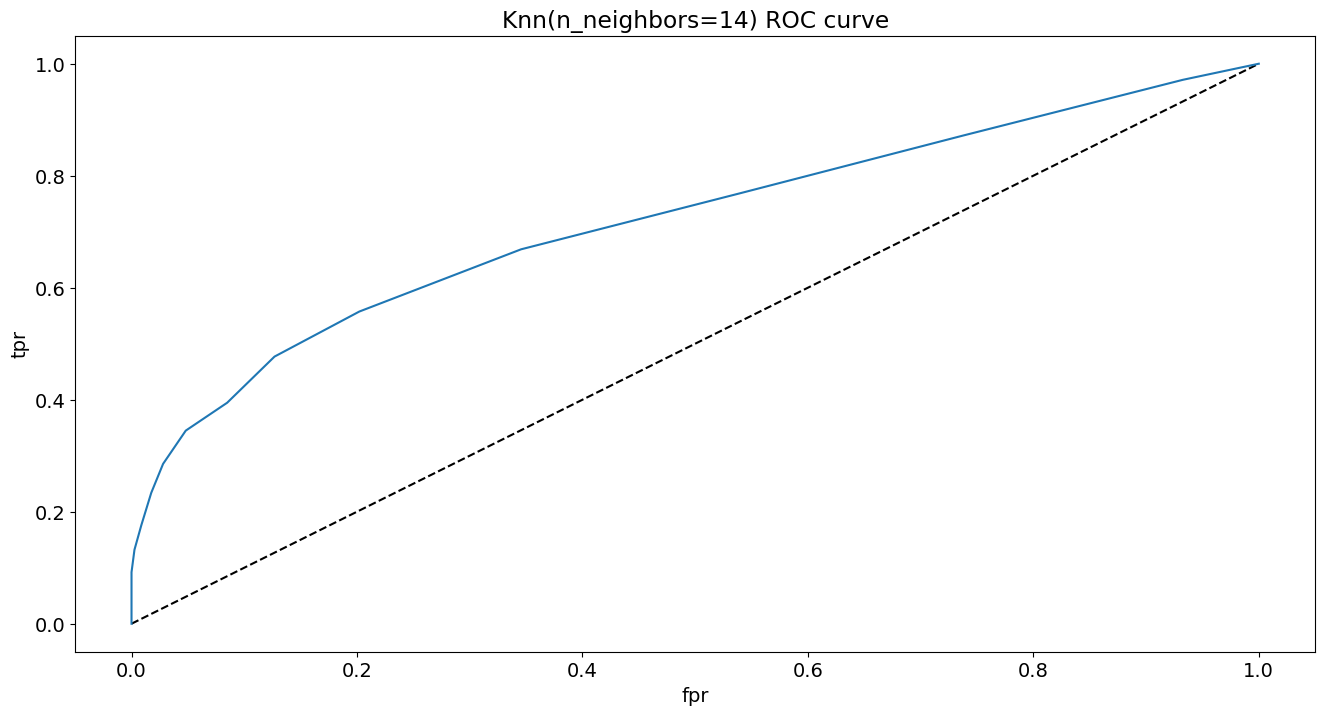

In [40]:
from sklearn.metrics import roc_curve
y_predito_proba = knn.predict_proba(X_teste)[:,1]
fpr, tpr, thresholds = roc_curve(y_teste, y_predito_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=14) ROC curve')
plt.show()